# Dinner Party Problem - Aqua Qiskit module

Using quantum computing to solve a dinner party constraints problem<br>

Task: Given those constraints find the possible inventations possabilities
```
{James AND Lars}
OR
{Kirk AND Rob}
AND NOT
{Lars AND Rob}
```

In the code:
```
0001 = James
0010 = Lars
0100 = Kirk
1000 = Rob

```

In [1]:
from qiskit import *
from qiskit import utils
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import PhaseOracle
from qiskit.algorithms import Grover, AmplificationProblem
%matplotlib inline 

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Getting a simulator
backend = Aer.get_backend('qasm_simulator')

In [3]:
q_instance = utils.QuantumInstance(backend)

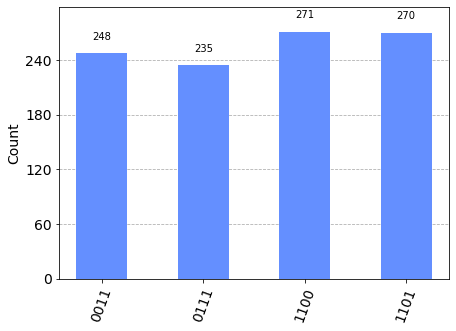

In [8]:
# Creating the constraints phase using logical expression generator
oracle = PhaseOracle('((James & Lars) | (Kirk & Rob)) & ~(Lars & Rob)')

# Load the constraints
problem = AmplificationProblem(oracle)

# Initializing a Grovers algorithm on the problem
grover = Grover(quantum_instance=q_instance)

# Run the circuit
result = grover.amplify(problem)

plot_histogram(result.circuit_results)


## Translateing the results:
### Possible inventations:
1. James, Lars
2. James, Lars, Kirk
3. Kirk, Rob
4. james, Kirk, Rob